In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split

### <a class="anchor" id="Matrix-Fact">Part I: Data loading and cleaning </a>

In [21]:

# Load the data
data_path = 'data/Most-Recent-Cohorts-Institution.csv'
df = pd.read_csv(data_path, low_memory=False)

# Display basic information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Columns: 3305 entries, UNITID to MD_EARN_WNE_MALE1_P11
dtypes: float64(919), int64(14), object(2372)
memory usage: 163.5+ MB
None
   UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and School

In [6]:
pd.set_option('display.max_columns', 500)
df.head(2)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01CERT1,CIP01CERT2,CIP01ASSOC,CIP01CERT4,CIP01BACHL,CIP03CERT1,CIP03CERT2,CIP03ASSOC,CIP03CERT4,CIP03BACHL,CIP04CERT1,CIP04CERT2,CIP04ASSOC,CIP04CERT4,CIP04BACHL,CIP05CERT1,CIP05CERT2,CIP05ASSOC,CIP05CERT4,CIP05BACHL,CIP09CERT1,CIP09CERT2,CIP09ASSOC,CIP09CERT4,CIP09BACHL,CIP10CERT1,CIP10CERT2,CIP10ASSOC,CIP10CERT4,CIP10BACHL,CIP11CERT1,CIP11CERT2,CIP11ASSOC,CIP11CERT4,CIP11BACHL,CIP12CERT1,CIP12CERT2,CIP12ASSOC,CIP12CERT4,CIP12BACHL,CIP13CERT1,CIP13CERT2,CIP13ASSOC,CIP13CERT4,CIP13BACHL,CIP14CERT1,CIP14CERT2,CIP14ASSOC,CIP14CERT4,CIP14BACHL,CIP15CERT1,CIP15CERT2,CIP15ASSOC,CIP15CERT4,CIP15BACHL,CIP16CERT1,CIP16CERT2,CIP16ASSOC,CIP16CERT4,CIP16BACHL,CIP19CERT1,CIP19CERT2,CIP19ASSOC,CIP19CERT4,CIP19BACHL,CIP22CERT1,CIP22CERT2,CIP22ASSOC,CIP22CERT4,CIP22BACHL,CIP23CERT1,CIP23CERT2,CIP23ASSOC,CIP23CERT4,CIP23BACHL,CIP24CERT1,CIP24CERT2,CIP24ASSOC,CIP24CERT4,CIP24BACHL,CIP25CERT1,CIP25CERT2,CIP25ASSOC,CIP25CERT4,CIP25BACHL,CIP26CERT1,CIP26CERT2,CIP26ASSOC,CIP26CERT4,CIP26BACHL,CIP27CERT1,CIP27CERT2,CIP27ASSOC,CIP27CERT4,CIP27BACHL,CIP29CERT1,CIP29CERT2,CIP29ASSOC,CIP29CERT4,CIP29BACHL,CIP30CERT1,CIP30CERT2,CIP30ASSOC,CIP30CERT4,CIP30BACHL,CIP31CERT1,CIP31CERT2,CIP31ASSOC,CIP31CERT4,CIP31BACHL,CIP38CERT1,CIP38CERT2,CIP38ASSOC,CIP38CERT4,CIP38BACHL,CIP39CERT1,CIP39CERT2,CIP39ASSOC,CIP39CERT4,CIP39BACHL,CIP40CERT1,CIP40CERT2,CIP40ASSOC,CIP40CERT4,CIP40BACHL,CIP41CERT1,CIP41CERT2,CIP41ASSOC,CIP41CERT4,CIP41BACHL,CIP42CERT1,CIP42CERT2,CIP42ASSOC,CIP42CERT4,CIP42BACHL,CIP43CERT1,CIP43CERT2,CIP43ASSOC,CIP43CERT4,CIP43BACHL,CIP44CERT1,CIP44CERT2,CIP44ASSOC,CIP44CERT4,CIP44BACHL,CIP45CERT1,CIP45CERT2,CIP45ASSOC,CIP45CERT4,CIP45BACHL,CIP46CERT1,...,BBRR4_FED_GRCOMP_FBR,BBRR4_FED_GRCOMP_DFR,BBRR4_FED_GRCOMP_NOPROG,BBRR4_FED_GRCOMP_MAKEPROG,BBRR4_FED_GRCOMP_PAIDINFULL,BBRR4_FED_GRCOMP_DISCHARGE,BBRR4_FED_GRNOCOMP_N,BBRR4_FED_GRNOCOMP_DFLT,BBRR4_FED_GRNOCOMP_DLNQ,BBRR4_FED_GRNOCOMP_FBR,BBRR4_FED_GRNOCOMP_DFR,BBRR4_FED_GRNOCOMP_NOPROG,BBRR4_FED_GRNOCOMP_MAKEPROG,BBRR4_FED_GRNOCOMP_PAIDINFULL,BBRR4_FED_GRNOCOMP_DISCHARGE,BBRR4_PP_UG_N,BBRR4_PP_UG_DFLT,BBRR4_PP_UG_DLNQ,BBRR4_PP_UG_FBR,BBRR4_PP_UG_DFR,BBRR4_PP_UG_NOPROG,BBRR4_PP_UG_MAKEPROG,BBRR4_PP_UG_PAIDINFULL,BBRR4_PP_UG_DISCHARGE,BBRR4_PP_UGCOMP_N,BBRR4_PP_UGCOMP_DFLT,BBRR4_PP_UGCOMP_DLNQ,BBRR4_PP_UGCOMP_FBR,BBRR4_PP_UGCOMP_DFR,BBRR4_PP_UGCOMP_NOPROG,BBRR4_PP_UGCOMP_MAKEPROG,BBRR4_PP_UGCOMP_PAIDINFULL,BBRR4_PP_UGCOMP_DISCHARGE,BBRR4_PP_UGNOCOMP_N,BBRR4_PP_UGNOCOMP_DFLT,BBRR4_PP_UGNOCOMP_DLNQ,BBRR4_PP_UGNOCOMP_FBR,BBRR4_PP_UGNOCOMP_DFR,BBRR4_PP_UGNOCOMP_NOPROG,BBRR4_PP_UGNOCOMP_MAKEPROG,BBRR4_PP_UGNOCOMP_PAIDINFULL,BBRR4_PP_UGNOCOMP_DISCHARGE,BBRR4_PP_UGUNK_N,BBRR4_PP_UGUNK_DFLT,BBRR4_PP_UGUNK_DLNQ,BBRR4_PP_UGUNK_FBR,BBRR4_PP_UGUNK_DFR,BBRR4_PP_UGUNK_NOPROG,BBRR4_PP_UGUNK_MAKEPROG,BBRR4_PP_UGUNK_PAIDINFULL,BBRR4_PP_UGUNK_DISCHARGE,BBRR4_FED_IND_N,BBRR4_FED_IND_DFLT,BBRR4_FED_IND_DLNQ,BBRR4_FED_IND_FBR,BBRR4_FED_IND_DFR,BBRR4_FED_IND_NOPROG,BBRR4_FED_IND_MAKEPROG,BBRR4_FED_IND_PAIDINFULL,BBRR4_FED_IND_DISCHARGE,BBRR4_FED_DEP_N,BBRR4_FED_DEP_DFLT,BBRR4_FED_DEP_DLNQ,BBRR4_FED_DEP_FBR,BBRR4_FED_DEP_DFR,BBRR4_FED_DEP_NOPROG,BBRR4_FED_DEP_MAKEPROG,BBRR4_FED_DEP_PAIDINFULL,BBRR4_FED_DEP_DISCHARGE,BBRR4_FED_PELL_N,BBRR4_FED_PELL_DFLT,BBRR4_FED_PELL_DLNQ,BBRR4_FED_P

In [7]:
list(df.columns)

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [11]:
# Adjust these based on the correct column names you find
retention_rate = 'RET_FT4'  # Example column name for retention rate
graduation_rate = 'C150_4'  # Example column name for graduation rate

# Handling missing values
# Drop rows with missing target values (adjust based on your specific target columns)
df = df.dropna(subset=[retention_rate, graduation_rate])
# df = df.dropna()
# Fill missing values for other columns (you can use mean/median/mode or other methods)
# df.fillna(df.mean(), inplace=True)

# Remove duplicates
df = df.drop_duplicates()

# Standardize data formats
# Convert columns to appropriate data types
df[retention_rate] = df[retention_rate].astype(float)
df[graduation_rate] = df[graduation_rate].astype(float)

# Save cleaned data to a new CSV file
df.to_csv('data/cleaned_data.csv', index=False)

print("Data cleaning completed and saved to 'data/cleaned_data.csv'")

Data cleaning completed and saved to 'data/cleaned_data.csv'


In [12]:
df[retention_rate].describe()

count    2033.000000
mean        0.727240
std         0.166236
min         0.000000
25%         0.660600
50%         0.745300
75%         0.832000
max         1.000000
Name: RET_FT4, dtype: float64

### <a class="anchor" id="Matrix-Fact">Part II: Descriptive Analysis </a>

Descriptive Questions
1. What are the average retention and graduation rates across different institutions?
2. This question helps us understand the central tendencies and variability of key metrics across universities.
3. What are the distributions of tuition fees, student demographics, and financial aid among the institutions?


In [20]:
df_cleaned = pd.read_csv("data/cleaned_data.csv", low_memory=False)

In [22]:
# Display summary statistics
summary_stats = df_cleaned.describe()
print(summary_stats)

              UNITID         OPEID        OPEID6      SCH_DEG         HCM2  \
count    2033.000000  2.028000e+03   2028.000000  2011.000000  2033.000000   
mean   219750.108706  8.011551e+05   7962.233728     2.861263     0.006886   
std    101067.521451  1.144075e+06  11251.733557     0.424553     0.082718   
min    100654.000000  1.002000e+05   1002.000000     1.000000     0.000000   
25%    157386.000000  2.114750e+05   2112.750000     3.000000     0.000000   
50%    196200.000000  3.146000e+05   3144.500000     3.000000     0.000000   
75%    228459.000000  6.662000e+05   6526.500000     3.000000     0.000000   
max    498571.000000  1.014590e+07  42995.000000     3.000000     1.000000   

              MAIN    NUMBRANCH      PREDDEG      HIGHDEG      CONTROL  \
count  2033.000000  2033.000000  2033.000000  2033.000000  2033.000000   
mean      0.917855     2.161830     2.873586     3.730448     1.767339   
std       0.274652     5.042329     0.404521     0.497180     0.589838   
m

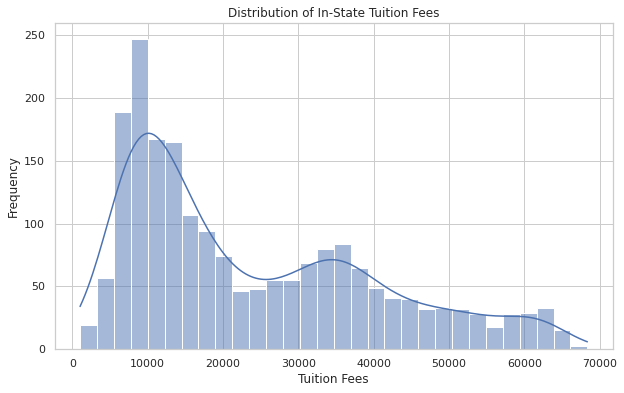

In [35]:
# Question2
# Distribution of tuition fees
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TUITIONFEE_IN'], kde=True, bins=30)
plt.title('Distribution of In-State Tuition Fees')
plt.xlabel('Tuition Fees')
plt.ylabel('Frequency')
plt.show()


### <a class="anchor" id="Matrix-Fact">Part III: Exploratory Analysis </a>
1. How do retention and graduation rates vary by institution type (e.g., public vs. private, four-year vs. less-than-four-year institutions)?
This question explores potential differences in key outcomes based on institution characteristics.

2. What are the relationships between financial factors (e.g., tuition fees, student loan amounts) and retention/graduation rates?
This helps us explore how financial aspects impact student outcomes.

3. How do student demographics (e.g., gender, race/ethnicity, socioeconomic background) influence retention and graduation rates?
This question investigates the potential impact of student demographics on educational outcomes.

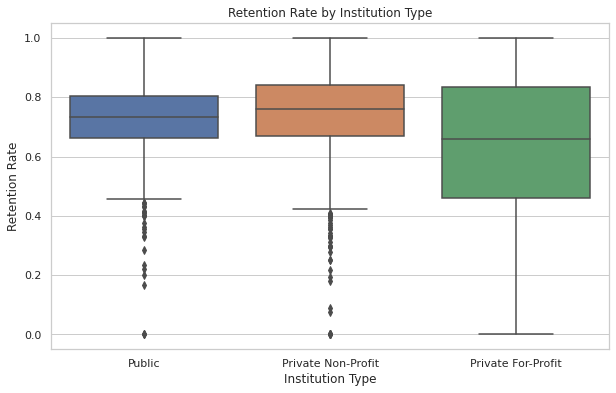

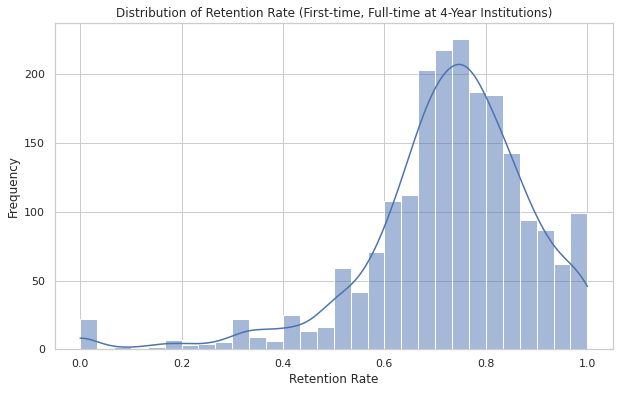

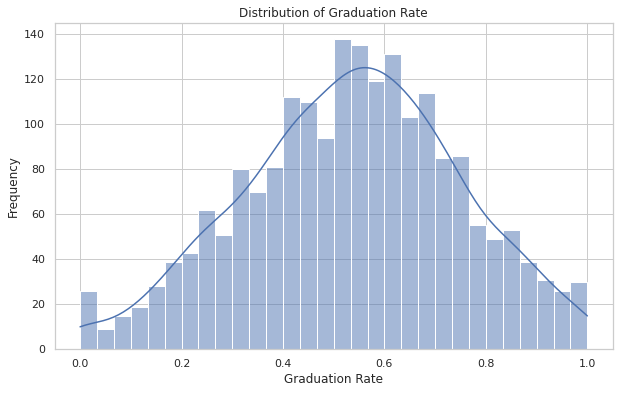

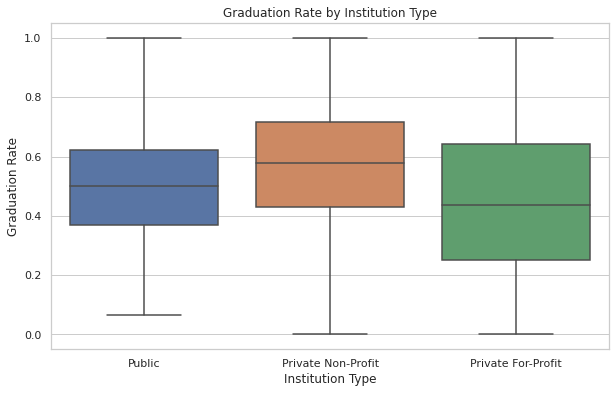

In [39]:
# Question 1 
# Set plot style
sns.set(style="whitegrid")
# Boxplot of retention rate by institution type

plt.figure(figsize=(10, 6))
sns.boxplot(x='CONTROL', y='RET_FT4', data=df_cleaned)
plt.title('Retention Rate by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Retention Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Public', 'Private Non-Profit', 'Private For-Profit'])
plt.show()

# Distribution of retention rate
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['RET_FT4'], kde=True, bins=30)
plt.title('Distribution of Retention Rate (First-time, Full-time at 4-Year Institutions)')
plt.xlabel('Retention Rate')
plt.ylabel('Frequency')
plt.show()

# Distribution of graduation rate
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['C150_4'], kde=True, bins=30)
plt.title('Distribution of Graduation Rate')
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.show()

# Boxplot of graduation rate by institution type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CONTROL', y='C150_4', data=df_cleaned)
plt.title('Graduation Rate by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Graduation Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Public', 'Private Non-Profit', 'Private For-Profit'])
plt.show()

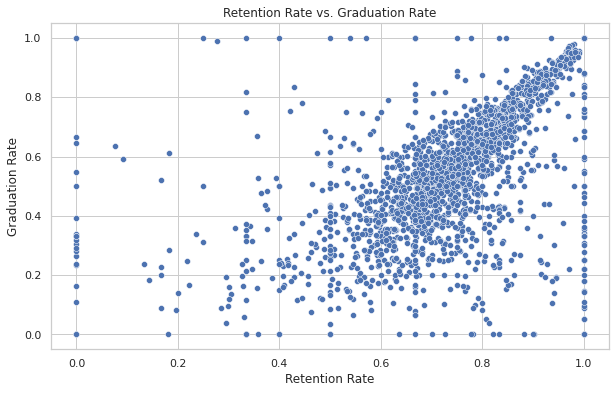

In [30]:
# Scatter plot of retention rate vs. graduation rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['RET_FT4'], y=df_cleaned['C150_4'])
plt.title('Retention Rate vs. Graduation Rate')
plt.xlabel('Retention Rate')
plt.ylabel('Graduation Rate')
plt.show()


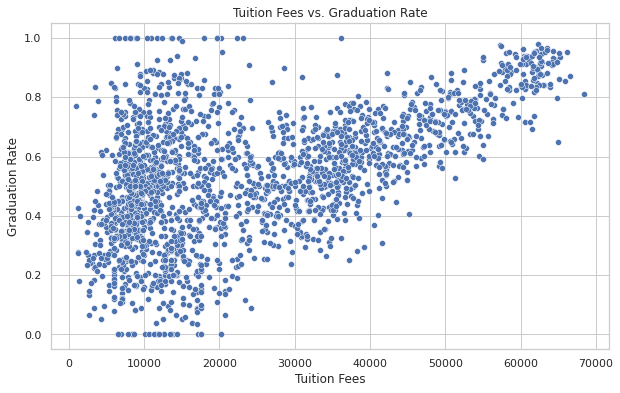

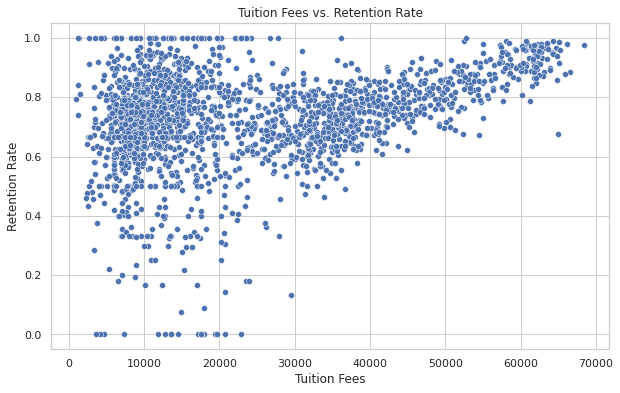

In [40]:
# Question 2
# Scatter plot of tuition fees vs. graduation rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TUITIONFEE_IN', y='C150_4', data=df_cleaned)
plt.title('Tuition Fees vs. Graduation Rate')
plt.xlabel('Tuition Fees')
plt.ylabel('Graduation Rate')
plt.show()

# Scatter plot of tuition fees vs. retention rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TUITIONFEE_IN', y='RET_FT4', data=df_cleaned)
plt.title('Tuition Fees vs. Retention Rate')
plt.xlabel('Tuition Fees')
plt.ylabel('Retention Rate')
plt.show()

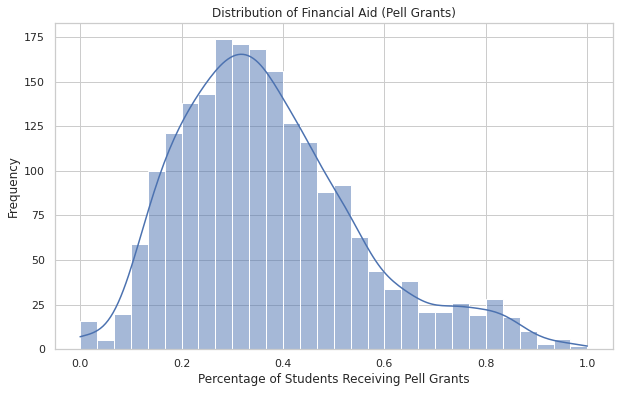

In [33]:
# Distribution of financial aid
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['PCTPELL'], kde=True, bins=30)
plt.title('Distribution of Financial Aid (Pell Grants)')
plt.xlabel('Percentage of Students Receiving Pell Grants')
plt.ylabel('Frequency')
plt.show()

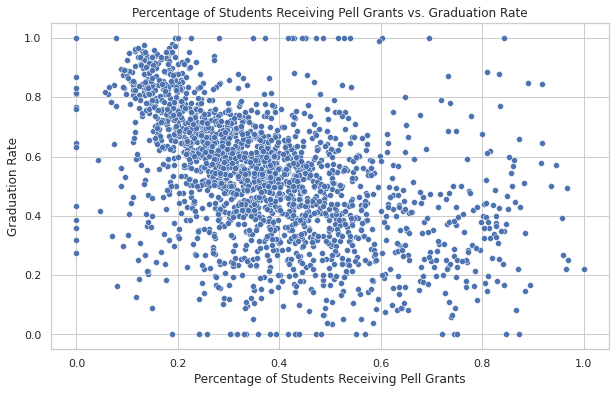

In [37]:

# Scatter plot of percentage of students receiving Pell grants vs. graduation rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCTPELL', y='C150_4', data=df_cleaned)
plt.title('Percentage of Students Receiving Pell Grants vs. Graduation Rate')
plt.xlabel('Percentage of Students Receiving Pell Grants')
plt.ylabel('Graduation Rate')
plt.show()

In [32]:
# Calculate the correlation matrix
# correlation_matrix = df_cleaned.corr(numeric_only=True)

# # Display the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()


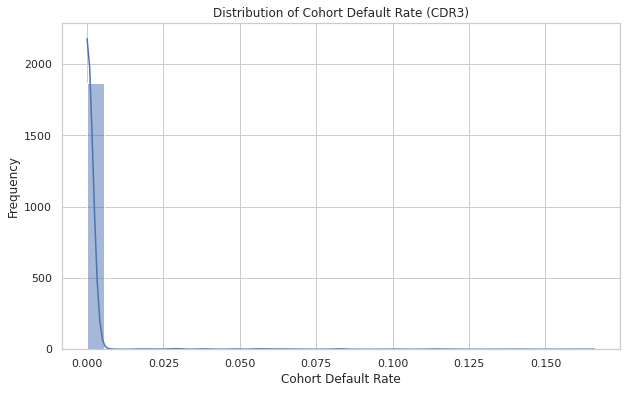

Proportion of zeros in CDR3: 90.16%


In [54]:
# Check the distribution of CDR3
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CDR3'], kde=True, bins=30)
plt.title('Distribution of Cohort Default Rate (CDR3)')
plt.xlabel('Cohort Default Rate')
plt.ylabel('Frequency')
plt.show()

# Calculate the proportion of zeros
zero_proportion = (df_cleaned['CDR3'] == 0).mean()
print(f"Proportion of zeros in CDR3: {zero_proportion:.2%}")

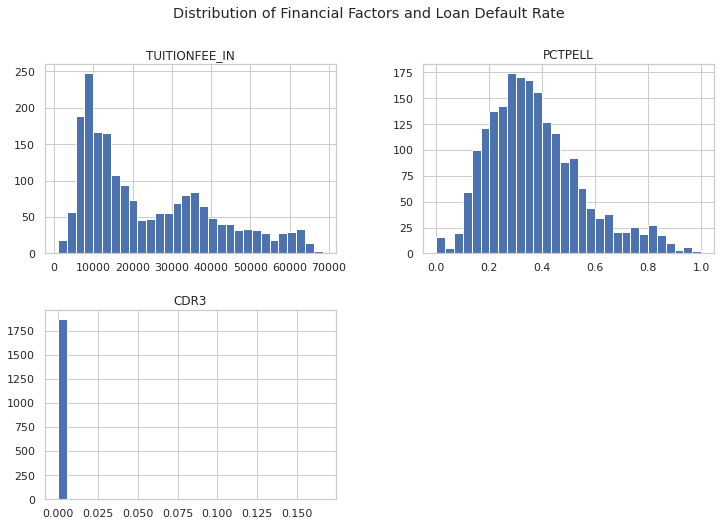

In [43]:
# Check distribution of variables
financial_factors = ['TUITIONFEE_IN', 'DEBT_MDN', 'PCTPELL', 'CDR3']
df_cleaned[financial_factors].hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Distribution of Financial Factors and Loan Default Rate')
plt.show()

### <a class="anchor" id="Matrix-Fact">Part III: Predictions </a>

In [105]:
# Feature selection
# Assuming relevant columns for the prediction
features = df_cleaned[['TUITIONFEE_IN', 'TUITIONFEE_OUT', 'AVGFACSAL', 'DEBT_MDN', 'PCTPELL', 
                       'COSTT4_A', 'NPT4_PUB', 'NPT4_PRIV', 'PCTFLOAN', 
                       'CONTROL', 'REGION', 'LOCALE', 'ADM_RATE', 'SAT_AVG', 'ACTCMMID', 
                       'UGDS', 'C150_4', 'RET_FT4_POOLED', 'RET_PT4_POOLED', 'UGDS_WHITE', 'UGDS_BLACK', 
                       'UGDS_HISP', 'UGDS_ASIAN', 'AGE_ENTRY', 'FEMALE', 'FIRST_GEN', 
                       'DEP_STAT_PCT_IND', 'PELL_EVER', 'FAMINC', 'MD_FAMINC', 'PAR_ED_PCT_1STGEN', 
                       'UG25ABV', 'PFTFAC',  'AVGFACSAL', 
                       'NPT41_PUB', 'NPT41_PRIV', 'COSTT4_A', 
                       'DEBT_N', 'FAMINC_IND', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 
                       'PAR_ED_PCT_MS']]

target_retention = df_cleaned['RET_FT4']
target_graduation = df_cleaned['C150_4']

# Convert categorical features to category dtype
categorical_features = ['CONTROL', 'REGION', 'LOCALE']
for col in categorical_features:
    features[col] = features[col].astype('category')

# Split the data for retention rate prediction
X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(features, target_retention, test_size=0.2, random_state=42)

# Split the data for graduation rate prediction
# X_train_grad, X_test_grad, y_train_grad, y_test_grad = train_test_split(features, target_graduation, test_size=0.2, random_state=42)

<ipython-input-105-792cdba79357>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = features[col].astype('category')
<ipython-input-105-792cdba79357>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = features[col].astype('category')
<ipython-input-105-792cdba79357>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [104]:
features.isna().sum().sort_values(ascending=False)

NPT41_PUB            1393
NPT4_PUB             1392
ACTCMMID             1057
SATMT75              1034
SATMT25              1034
SATVR75              1034
SATVR25              1034
SAT_AVG               958
NPT41_PRIV            713
NPT4_PRIV             685
RET_PT4_POOLED        479
ADM_RATE              378
PFTFAC                122
UG25ABV                85
COSTT4_A               64
COSTT4_A               64
FEMALE                 54
MD_FAMINC              54
AGE_ENTRY              54
DEP_STAT_PCT_IND       54
FIRST_GEN              54
PAR_ED_PCT_MS          54
PAR_ED_PCT_1STGEN      54
FAMINC                 54
FAMINC_IND             54
PELL_EVER              54
AVGFACSAL              32
AVGFACSAL              32
TUITIONFEE_IN          31
TUITIONFEE_OUT         31
DEBT_N                 18
DEBT_MDN               18
PCTFLOAN                6
PCTPELL                 6
UGDS_HISP               0
UGDS_BLACK              0
UGDS_WHITE              0
RET_FT4_POOLED          0
C150_4      

In [ ]:
features

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
model_ret = RandomForestRegressor(n_estimators=100, random_state=42)
# model_grad = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
model_ret.fit(X_train_ret, y_train_ret)
# model_grad.fit(X_train_grad, y_train_grad)

# Predict on the test sets
y_pred_ret = model_ret.predict(X_test_ret)
# y_pred_grad = model_grad.predict(X_test_grad)

# Evaluate the models for retention rate prediction
mae_ret = mean_absolute_error(y_test_ret, y_pred_ret)
mse_ret = mean_squared_error(y_test_ret, y_pred_ret)
r2_ret = r2_score(y_test_ret, y_pred_ret)

print('Retention Rate Model')
print('MAE:', mae_ret)
print('MSE:', mse_ret)
print('R^2:', r2_ret)

# # Evaluate the models for graduation rate prediction
# mae_grad = mean_absolute_error(y_test_grad, y_pred_grad)
# mse_grad = mean_squared_error(y_test_grad, y_pred_grad)
# r2_grad = r2_score(y_test_grad, y_pred_grad)

# print('\nGraduation Rate Model')
# print('MAE:', mae_grad)
# print('MSE:', mse_grad)
# print('R^2:', r2_grad)

ValueError: could not convert string to float: 'PS'